In [46]:
%config ZMQInteractiveShell.ast_node_interactivity='all'

In [47]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression


In [48]:
data = pd.read_csv('rankingcard.csv',index_col=0)

In [49]:
data.head()
data.info()

#data.shape
#(150000, 11)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [50]:
data.drop_duplicates(inplace=True)
data.info()
# 恢复序列号！重要！！！
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                     

In [51]:
data.isnull().sum()/data.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [52]:
data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [53]:
#df.loc[i]  用index == i 的来取 
#df.iloc[i] 用绝对位置i来取
from sklearn.ensemble import RandomForestRegressor

def fill_miss_rf(X,y,to_fill):
    """    
    使用随机森林填补一个特征的缺失值的函数
 
   参数：    
    X：要填补的特征矩阵    
    y：完整的，没有缺失值的标签    
    to_fill：字符串，要填补的那一列的名称    
    
    """
    df = X.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns != to_fill],pd.DataFrame(y)],axis=1)
    
    ytrain = fill[fill.notnull()]
    ytest = fill[fill.isnull()]
    Xtrain = df.iloc[ytrain.index,:]
    Xtest = df.iloc[ytest.index,:]
    
    rfr = RandomForestRegressor(n_estimators=100)
    rfr = rfr.fit(Xtrain,ytrain)
    ypredict = rfr.predict(Xtest)
    
    return ypredict
    

In [54]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
# y1 = data['SeriousDlqin2yrs']
# y == y1
X.shape #(149391, 10)

(149391, 10)

In [55]:
y_predict = fill_miss_rf(X,y,"MonthlyIncome")
data.loc[data.loc[:,"MonthlyIncome"].isnull(),"MonthlyIncome"] = y_predict


In [56]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           149391 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [57]:
data.describe([0.01,0.1,0.25,.5,.75,.9,.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5424.262207,13228.546083,0.0,0.0,0.180000,1800.000000,4420.000000,7416.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [58]:
(data["age"] == 0).sum() 
data = data[data["age"] != 0 ]

1

In [59]:
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90].count()
data = data[data.loc[:,"NumberOfTimes90DaysLate"] < 90]
data.index = range(data.shape[0])
data.info()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
SeriousDlqin2yrs                        149165 non-null int64
RevolvingUtilizationOfUnsecuredLines    149165 non-null float64
age                                     149165 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149165 non-null int64
DebtRatio                               149165 non-null float64
MonthlyIncome                           149165 non-null float64
NumberOfOpenCreditLinesAndLoans         149165 non-null int64
NumberOfTimes90DaysLate                 149165 non-null int64
NumberRealEstateLoansOrLines            149165 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149165 non-null int64
NumberOfDependents                      149165 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [60]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
y.value_counts()
# 0:139293 
# 1:9873
n_sample = X.shape[0]
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]

print('样本个数:{};\n1占{:.2%};\n0占{:.2%}'.format(n_sample,
                                                    n_1_sample/n_sample,
                                                    n_0_sample/n_sample)
     )

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

样本个数:149165;
1占6.62%;
0占93.38%


In [61]:
import imblearn

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X,y = sm.fit_sample(X,y)

n_sample_ = X.shape[0]
pd.Series(y).value_counts()

n_1_sample = pd.Series(y).value_counts()[1]
n_0_sample = pd.Series(y).value_counts()[0]


1    139292
0    139292
dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X)
y = pd.DataFrame(y)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=420)
model_data = pd.concat([ytrain,Xtrain],axis=1)
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

In [63]:
test_data = pd.concat([ytest,Xtest],axis=1)
test_data.index = range(test_data.shape[0])
test_data.columns = data.columns

In [64]:
model_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195008 entries, 0 to 195007
Data columns (total 11 columns):
SeriousDlqin2yrs                        195008 non-null int64
RevolvingUtilizationOfUnsecuredLines    195008 non-null float64
age                                     195008 non-null float64
NumberOfTime30-59DaysPastDueNotWorse    195008 non-null float64
DebtRatio                               195008 non-null float64
MonthlyIncome                           195008 non-null float64
NumberOfOpenCreditLinesAndLoans         195008 non-null float64
NumberOfTimes90DaysLate                 195008 non-null float64
NumberRealEstateLoansOrLines            195008 non-null float64
NumberOfTime60-89DaysPastDueNotWorse    195008 non-null float64
NumberOfDependents                      195008 non-null float64
dtypes: float64(10), int64(1)
memory usage: 16.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83576 entries, 0 to 83575
Data columns (total 11 columns):
SeriousDlqin2yrs          

# 分箱

## Information Value
利用IV值来确定分箱个数
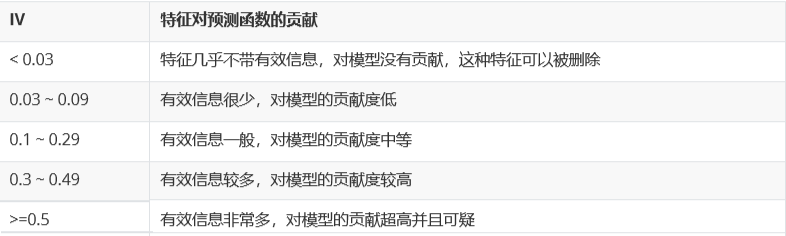